In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Loading The  data
file_path = "../Data/MachineLearningRating_v3.txt"

data = pd.read_csv(file_path, sep='|', low_memory=False)

Data Shape: (1000098, 52)
Data Columns: Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')
Data Types: UnderwrittenCoverID           int

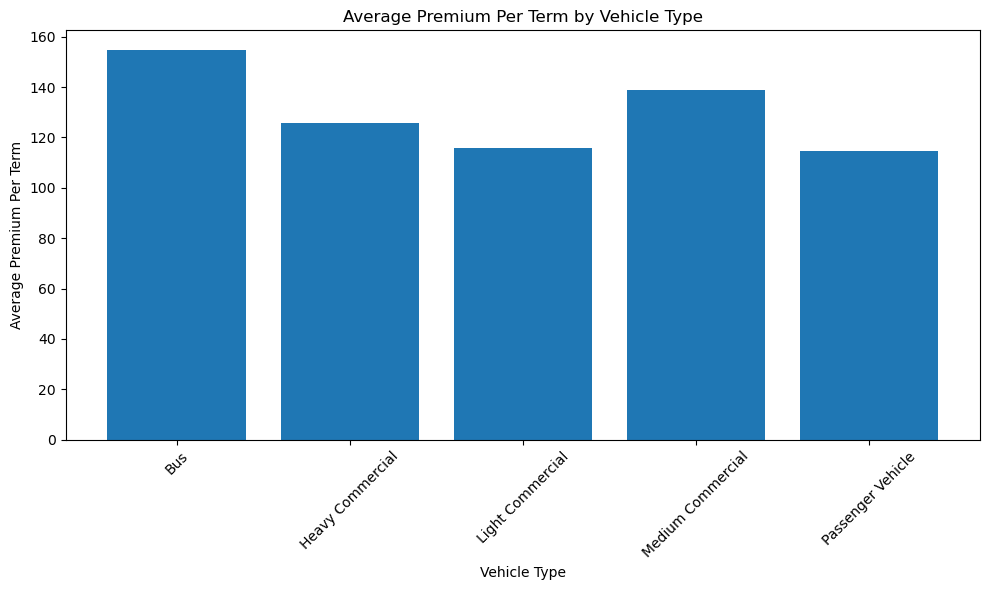

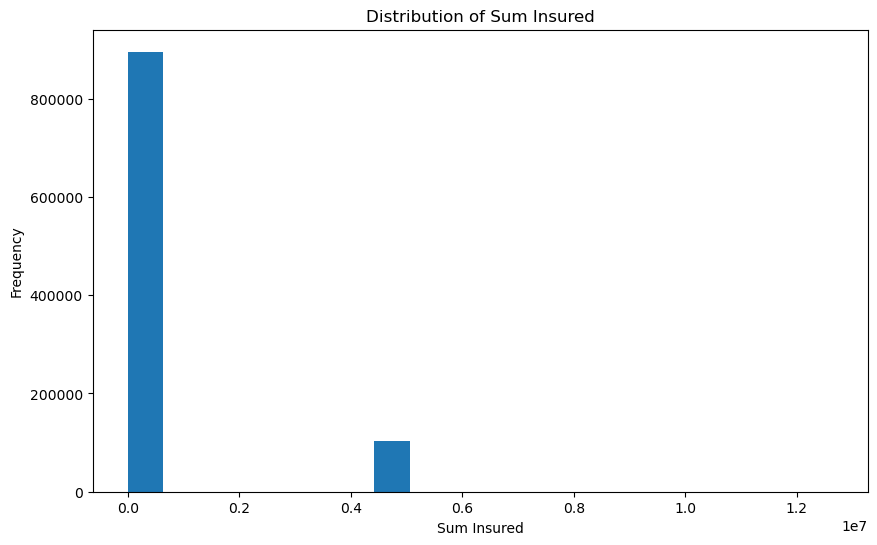

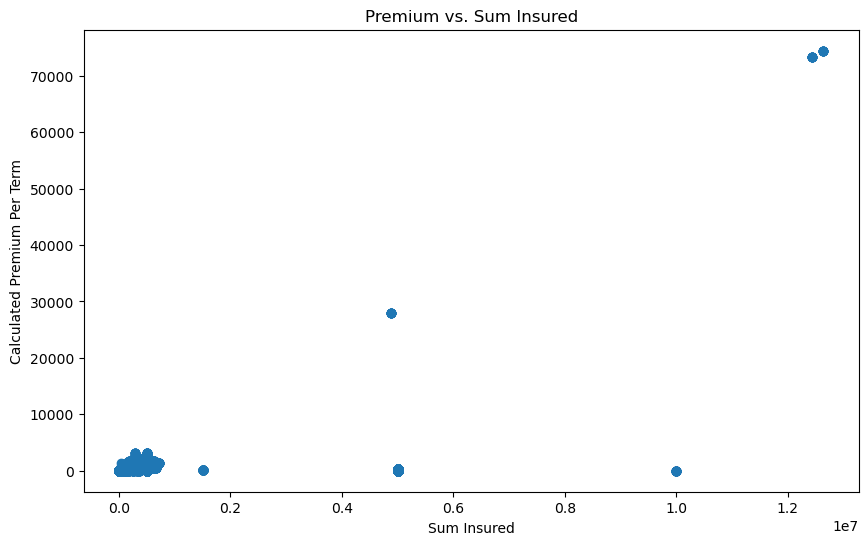

Number of Vehicles by Province:
 Province
Gauteng          393865
Western Cape     170796
KwaZulu-Natal    169781
North West       143287
Mpumalanga        52718
Eastern Cape      30336
Limpopo           24836
Free State         8099
Northern Cape      6380
Name: count, dtype: int64


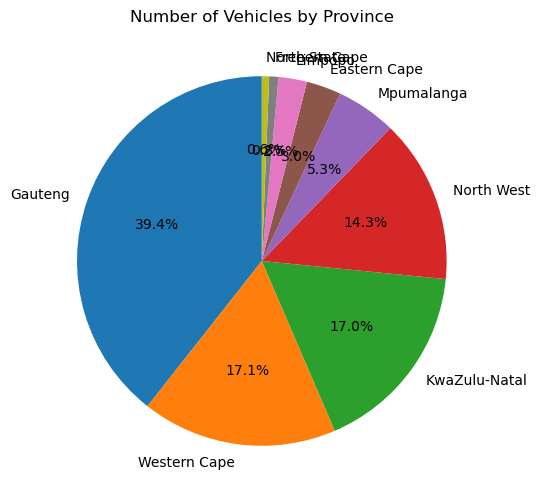

In [3]:
def explore_data(data):
    """Explore the loaded DataFrame.

    Args:
        data (pandas.DataFrame): The DataFrame to explore.

    Returns:
        None
    """
    print("Data Shape:", data.shape)
    print("Data Columns:", data.columns)
    print("Data Types:", data.dtypes)
    print("Missing Values:\n", data.isnull().sum())
    print("Descriptive Statistics:\n", data.describe())

def analyze_data(data):
    """Analyzes the loaded DataFrame.

    Args:
        data (pandas.DataFrame): The DataFrame to analyze.

    Returns:
        None
    """
    
    # Calculate the average premium per term for each vehicle type
    avg_premium_by_type = data.groupby("VehicleType")["CalculatedPremiumPerTerm"].mean()
    print("Average Premium Per Term by Vehicle Type:\n", avg_premium_by_type)

  # Create a bar chart
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.bar(avg_premium_by_type.index, avg_premium_by_type.values)
    plt.xlabel("Vehicle Type")
    plt.ylabel("Average Premium Per Term")
    plt.title("Average Premium Per Term by Vehicle Type")
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.show()
 #  Distribution of Sum Insured
    plt.figure(figsize=(10, 6))
    plt.hist(data["SumInsured"], bins=20)  # Adjust bins as needed
    plt.xlabel("Sum Insured")
    plt.ylabel("Frequency")
    plt.title("Distribution of Sum Insured")
    plt.show()

    #  Premium vs. Sum Insured
    plt.figure(figsize=(10, 6))
    plt.scatter(data["SumInsured"], data["CalculatedPremiumPerTerm"])
    plt.xlabel("Sum Insured")
    plt.ylabel("Calculated Premium Per Term")
    plt.title("Premium vs. Sum Insured")
    plt.show()

    #  Number of Vehicles by Province
    vehicle_count_by_province = data["Province"].value_counts()
    print("Number of Vehicles by Province:\n", vehicle_count_by_province)
    plt.figure(figsize=(10, 6))
    plt.pie(vehicle_count_by_province.values, labels=vehicle_count_by_province.index, autopct='%1.1f%%', startangle=90)
    plt.title("Number of Vehicles by Province")
    plt.show()
if __name__ == "__main__":

    # Explore the data
    explore_data(data)

    # Analyze the data
    analyze_data(data)

Data Quality Assessment

In [8]:
# Function to check for missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values

# Function to handle missing values
def handle_missing_values(df):
    # Fill missing values with appropriate methods
    df['IsVATRegistered'].fillna(False, inplace=True)
    df['Citizenship'].fillna('Unknown', inplace=True)
    df['LegalType'].fillna('Unknown', inplace=True)
    df['Bank'].fillna('Unknown', inplace=True)
    df['AccountType'].fillna('Not specified', inplace=True)
    df['MaritalStatus'].fillna('Not specified', inplace=True)
    df['Gender'].fillna('Not specified', inplace=True)
    df['mmcode'].fillna(0, inplace=True)
    df['VehicleType'].fillna('Not specified', inplace=True)
    df['make'].fillna('Not specified', inplace=True)
    df['Model'].fillna('Not specified', inplace=True)
    # Continue filling missing values for other columns as needed
    
    return df

In [7]:
# Check missing values in the dataframe
missing_values = check_missing_values(data)
print("Missing Values:")
print(missing_values)


Missing Values:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoor

In [9]:
# Handle missing values in the dataframe
df = handle_missing_values(data)

# Verify that missing values have been handled
missing_values_after_handling = check_missing_values(df)
print("\nMissing Values after Handling:")
print(missing_values_after_handling)


Missing Values after Handling:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        